##  [Gant Laborde](https://twitter.com/gantlaborde)




# Creating Riddikulus Sort


This script contains the code to download the dataset for 10 classes, shuffle the data and split it into training and testing. The script contains other methods (t-SNE plotting for instance).

In [1]:
!wget https://raw.githubusercontent.com/GantMan/riddikulus-sort/master/28x28/quickdraw_houses.py

--2020-12-25 23:41:49--  https://raw.githubusercontent.com/GantMan/riddikulus-sort/master/28x28/quickdraw_houses.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2809 (2.7K) [text/plain]
Saving to: ‘quickdraw_houses.py’

quickdraw_houses.py 100%[===================>]   2.74K  --.-KB/s    in 0s      

2020-12-25 23:41:49 (66.2 MB/s) - ‘quickdraw_houses.py’ saved [2809/2809]



In [2]:
from quickdraw_houses import download_and_load, plot_tsne

# Imports

In [3]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Load the Data 

In [4]:
x_train, y_train, x_test, y_test, class_names = download_and_load()

downloading ...
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bird.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/owl.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/parrot.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/snake.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/snail.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/lion.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/tiger.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/raccoon.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/squirrel.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/skull.npy
loading ...
Training Data :  80000
Testing  Data :  20000


In [5]:
class_names

['bird',
 'owl',
 'parrot',
 'snake',
 'snail',
 'lion',
 'tiger',
 'raccoon',
 'squirrel',
 'skull']

# Visualization

In [6]:
def visualize_classes():
  for i in range(0, 10):
    img_batch = x_train[y_train == i][0:10]
    img_batch = np.reshape(img_batch, (img_batch.shape[0]*img_batch.shape[1], img_batch.shape[2]))
    if i > 0:
      img = np.concatenate([img, img_batch], axis = 1)
    else:
      img = img_batch
  plt.figure(figsize=(10,20))
  plt.axis('off')
  plt.imshow(img)

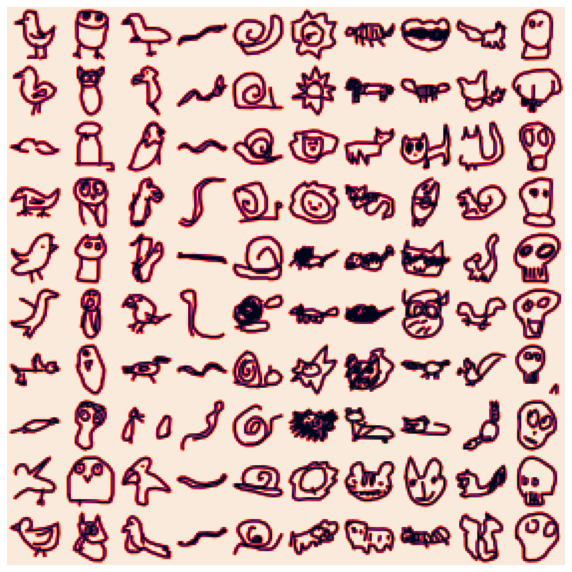

In [7]:
visualize_classes()

In [8]:
# Prep for print
sns.set_palette('colorblind')

## Labels distirubtion

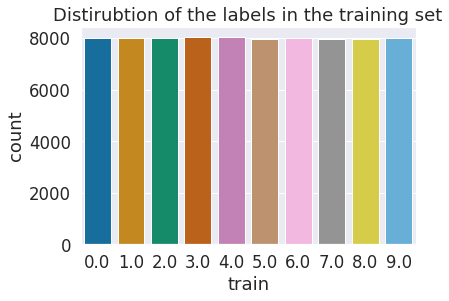

In [9]:
data = {}
data['train'] = y_train
df = pd.DataFrame.from_dict(data)
ax = sns.countplot(x = 'train', data=df).set_title("Distirubtion of the labels in the training set")

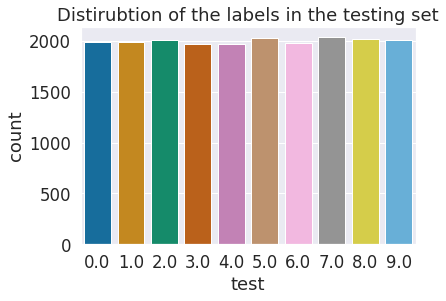

In [10]:
data = {}
data['test'] = y_test
df = pd.DataFrame.from_dict(data)
ax = sns.countplot(x = 'test', data=df).set_title("Distirubtion of the labels in the testing set")

## T-SNE

plot a t-sne distirubtion of 1000 sample from the training set 

In [11]:
x_train.shape

(80000, 28, 28)

In [12]:
y = y_train[0:1000]
y[0:10]

array([0., 6., 8., 9., 4., 8., 5., 6., 0., 0.])

calculating tsne ...


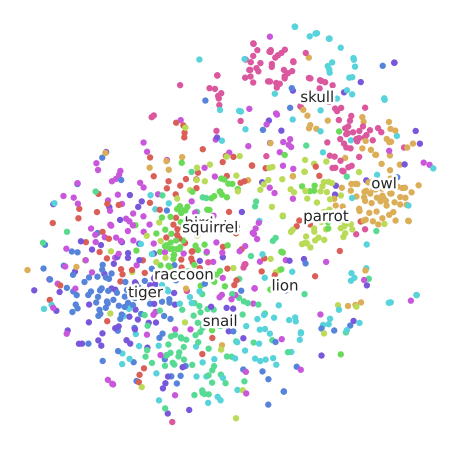

In [13]:
X = np.reshape(x_train, (x_train.shape[0], 28 * 28))[0:1000]
y = y_train[0:1000]
plot_tsne(X, y)

# Preprocess the Data 

In [14]:
print(type(x_train))
print(x_train.shape)
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(80000, 28, 28)
<class 'numpy.ndarray'>
(80000,)


In [15]:
image_size = 28

# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, len(class_names))
y_test = keras.utils.to_categorical(y_test, len(class_names))

In [16]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(80000, 28, 28, 1)


# The Model 

In [38]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(len(class_names), activation='softmax')) 
# Train model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

# Training 

In [18]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, epochs=20)

Epoch 1/20
282/282 [==============================] - 6s 6ms/step - loss: 1.6342 - accuracy: 0.4514 - val_loss: 0.9482 - val_accuracy: 0.6995
Epoch 2/20
282/282 [==============================] - 1s 4ms/step - loss: 0.8989 - accuracy: 0.7082 - val_loss: 0.7723 - val_accuracy: 0.7530
Epoch 3/20
282/282 [==============================] - 1s 4ms/step - loss: 0.7652 - accuracy: 0.7511 - val_loss: 0.7490 - val_accuracy: 0.7573
Epoch 4/20
282/282 [==============================] - 1s 4ms/step - loss: 0.6944 - accuracy: 0.7735 - val_loss: 0.6719 - val_accuracy: 0.7816
Epoch 5/20
282/282 [==============================] - 1s 4ms/step - loss: 0.6487 - accuracy: 0.7850 - val_loss: 0.6428 - val_accuracy: 0.7889
Epoch 6/20
282/282 [==============================] - 1s 4ms/step - loss: 0.6098 - accuracy: 0.7981 - val_loss: 0.6269 - val_accuracy: 0.7968
Epoch 7/20
282/282 [==============================] - 1s 4ms/step - loss: 0.5877 - accuracy: 0.8049 - val_loss: 0.6257 - val_accuracy: 0.7974
Epoch 

# Testing 

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 80.34%


# Check Some Incorrect Labeling

True Label  tiger
Pred Label  raccoon


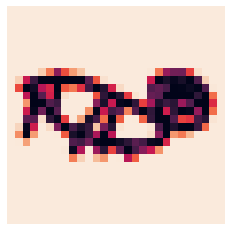

In [21]:
#get predictions and true labels
yhat = np.argmax(model.predict(x_test), axis = 1)
y    = np.argmax(y_test, axis = 1)

#get the indices of the bad labels 
bad_labels = np.argwhere((y == yhat) == False).squeeze()

#choose a random index with incorrect label 
idx = np.random.choice(bad_labels)

print('True Label ',class_names[y[idx]])
print('Pred Label ',class_names[yhat[idx]])
plt.imshow(x_test[idx].squeeze())
plt.axis('off')
plt.show()

# Let's Do the cleanup using the model

## Remove all the failing images

So start by gluing everything back

In [22]:
all_x = np.concatenate((x_train, x_test))
all_y = np.concatenate((y_train, y_test))
all_y.shape

(100000, 10)

In [23]:
yhat = np.argmax(model.predict(all_x), axis = 1)
y    = np.argmax(all_y, axis = 1)

#get the indices of the bad labels 
bad_labels = np.argwhere((y == yhat) == False).squeeze()

clean_y = np.delete(all_y, bad_labels, 0)
clean_x = np.delete(all_x, bad_labels, 0)
clean_x.shape

(86071, 28, 28, 1)

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))
score = model.evaluate(clean_x, clean_y, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 80.34%
Test accuarcy: 100.00%


# TSNE of cleaned version

In [25]:
rehydrated_clean_x = clean_x * 255.0
y = np.argmax(clean_y, axis=1) # undo 1 hot encoding
rehydrated_clean_x.shape

(86071, 28, 28, 1)

In [26]:
def visualize_classes2():
  for i in range(0, 10):
    img_batch = rehydrated_clean_x[y == i][0:10]
    img_batch = np.reshape(img_batch, (img_batch.shape[0]*img_batch.shape[1], img_batch.shape[2]))
    if i > 0:
      img = np.concatenate([img, img_batch], axis = 1)
    else:
      img = img_batch
  plt.figure(figsize=(10,20))
  plt.axis('off')
  plt.imshow(img)

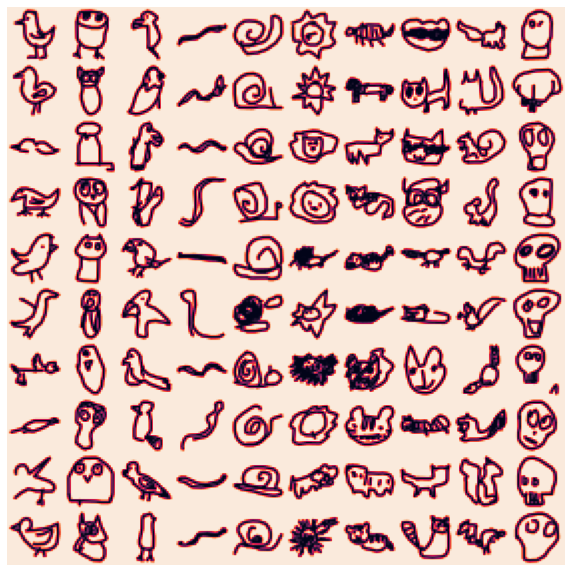

In [27]:
visualize_classes2()

calculating tsne ...


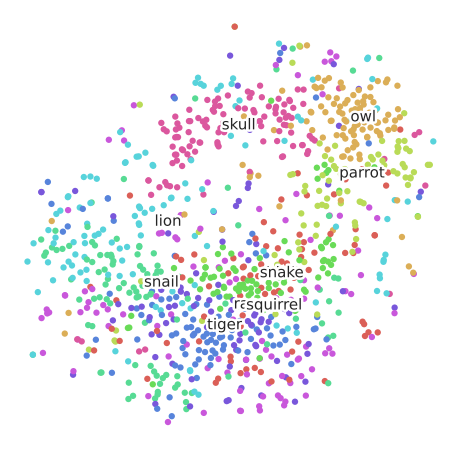

In [32]:
Xt = np.reshape(rehydrated_clean_x, (rehydrated_clean_x.shape[0], 28 * 28))[0:1000]
yt = clean_y[0:1000]
yt = np.argmax(yt, axis=1) # undo 1 hot encoding
plot_tsne(Xt, yt)

## Retrain?


In [39]:
model.fit(x = clean_x, y = clean_y, validation_split=0.1, batch_size = 256, epochs=20)

Epoch 1/20
302/302 [==============================] - 2s 4ms/step - loss: 1.3963 - accuracy: 0.5273 - val_loss: 0.4864 - val_accuracy: 0.8439
Epoch 2/20
302/302 [==============================] - 1s 4ms/step - loss: 0.5750 - accuracy: 0.8066 - val_loss: 0.3218 - val_accuracy: 0.8927
Epoch 3/20
302/302 [==============================] - 1s 4ms/step - loss: 0.4438 - accuracy: 0.8493 - val_loss: 0.2667 - val_accuracy: 0.9111
Epoch 4/20
302/302 [==============================] - 1s 4ms/step - loss: 0.3653 - accuracy: 0.8726 - val_loss: 0.2235 - val_accuracy: 0.9207
Epoch 5/20
302/302 [==============================] - 1s 4ms/step - loss: 0.3302 - accuracy: 0.8839 - val_loss: 0.2035 - val_accuracy: 0.9296
Epoch 6/20
302/302 [==============================] - 1s 4ms/step - loss: 0.2899 - accuracy: 0.8989 - val_loss: 0.1975 - val_accuracy: 0.9294
Epoch 7/20
302/302 [==============================] - 1s 4ms/step - loss: 0.2675 - accuracy: 0.9066 - val_loss: 0.1775 - val_accuracy: 0.9377
Epoch 

In [31]:
yhat = np.argmax(model.predict(clean_x), axis = 1)
y    = np.argmax(clean_y, axis = 1)

#get the indices of the bad labels 
bad_labels = np.argwhere((y == yhat) == False).squeeze()

clean_y = np.delete(clean_y, bad_labels, 0)
clean_x = np.delete(clean_x, bad_labels, 0)
clean_x.shape

(85823, 28, 28, 1)

## Save the 28x28s as images

In [33]:
import matplotlib

In [34]:
!mkdir 28x28
!mkdir 28x28/0
!mkdir 28x28/1
!mkdir 28x28/2
!mkdir 28x28/3
!mkdir 28x28/4
!mkdir 28x28/5
!mkdir 28x28/6
!mkdir 28x28/7
!mkdir 28x28/8
!mkdir 28x28/9

Make a bunch of 28x28 images

In [35]:
full_length = y.shape[0]
# for debugging
# full_length = 6
for idx in range(full_length - 1):
  cur_class = np.take(y, idx)
  cur_image = np.take(clean_x, idx, 0)
  matplotlib.image.imsave('28x28/' + np.array2string(cur_class) + '/' + str(idx) + '.png', cur_image.squeeze())
  

In [36]:
!zip -r 28x28raster.zip 28x28/

Streaming output truncated to the last 5000 lines.
  adding: 28x28/4/30248.png (stored 0%)
  adding: 28x28/4/249.png (stored 0%)
  adding: 28x28/4/40193.png (stored 0%)
  adding: 28x28/4/82227.png (stored 0%)
  adding: 28x28/4/29756.png (stored 0%)
  adding: 28x28/4/82666.png (stored 0%)
  adding: 28x28/4/59549.png (stored 0%)
  adding: 28x28/4/48925.png (stored 0%)
  adding: 28x28/4/75176.png (stored 0%)
  adding: 28x28/4/70032.png (stored 0%)
  adding: 28x28/4/35528.png (stored 0%)
  adding: 28x28/4/67930.png (stored 0%)
  adding: 28x28/4/78010.png (stored 0%)
  adding: 28x28/4/52622.png (stored 0%)
  adding: 28x28/4/2798.png (stored 0%)
  adding: 28x28/4/85794.png (stored 0%)
  adding: 28x28/4/34104.png (stored 0%)
  adding: 28x28/4/54798.png (stored 0%)
  adding: 28x28/4/82784.png (stored 0%)
  adding: 28x28/4/82596.png (stored 0%)
  adding: 28x28/4/67505.png (stored 0%)
  adding: 28x28/4/60066.png (stored 0%)
  adding: 28x28/4/69795.png (stored 0%)
  adding: 28x28/4/6578.png (stor

----

# Let's see the difference with a 256x256 image dataset

Download the JPGs

In [ ]:
!wget https://s3.amazonaws.com/ir_public/ai/houses/rastered/256x256jpgs.zip

--2020-12-23 19:14:36--  https://s3.amazonaws.com/ir_public/ai/houses/rastered/jpgs.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.232.149
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.232.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 640868809 (611M) [application/zip]
Saving to: ‘jpgs.zip’

jpgs.zip            100%[===================>] 611.18M  35.4MB/s    in 18s     

2020-12-23 19:14:54 (33.9 MB/s) - ‘jpgs.zip’ saved [640868809/640868809]



In [ ]:
!unzip 256x256jpgs.zip

Streaming output truncated to the last 5000 lines.
  inflating: jpgs/snake/full_simplified_snake_8630.jpg  
  inflating: jpgs/snake/full_simplified_snake_1172.jpg  
  inflating: jpgs/snake/full_simplified_snake_6604.jpg  
  inflating: jpgs/snake/full_simplified_snake_9537.jpg  
  inflating: jpgs/snake/full_simplified_snake_0275.jpg  
  inflating: jpgs/snake/full_simplified_snake_8629.jpg  
  inflating: jpgs/snake/full_simplified_snake_4013.jpg  
  inflating: jpgs/snake/full_simplified_snake_2462.jpg  
  inflating: jpgs/snake/full_simplified_snake_2304.jpg  
  inflating: jpgs/snake/full_simplified_snake_4775.jpg  
  inflating: jpgs/snake/full_simplified_snake_0513.jpg  
  inflating: jpgs/snake/full_simplified_snake_6162.jpg  
  inflating: jpgs/snake/full_simplified_snake_9251.jpg  
  inflating: jpgs/snake/full_simplified_snake_7268.jpg  
  inflating: jpgs/snake/full_simplified_snake_0507.jpg  
  inflating: jpgs/snake/full_simplified_snake_1619.jpg  
  inflating: jpgs/snake/full_simplifi

## Load the JPGs into x_train and y_train

In [ ]:
# Reimport for starting half way
import numpy as np

from pathlib import Path
from tensorflow.keras.preprocessing import image
import glob

# Empty lists to hold the images and labels for each each image
x_train2 = []
y_train2 = []


for image_file in Path("jpgs").glob("**/*.jpg"):
    # Load the current image file
    image_data = image.load_img(image_file, color_mode="grayscale", target_size=(128, 128))
    # Convert the loaded image file to a numpy array
    image_array = image.img_to_array(image_data)
    # Add the current image to our list of training images
    x_train2.append(image_array)  

    # Add a label for this image.
    if "bird" in image_file.stem:
        y_train2.append(0)
    elif "lion" in image_file.stem:
        y_train2.append(1) 
    elif "owl" in image_file.stem:
        y_train2.append(2) 
    elif "parrot" in image_file.stem:
        y_train2.append(3) 
    elif "raccoon" in image_file.stem:
        y_train2.append(4) 
    elif "skull" in image_file.stem:
        y_train2.append(5) 
    elif "snail" in image_file.stem:
        y_train2.append(6) 
    elif "snake" in image_file.stem:
        y_train2.append(7) 
    elif "squirrel" in image_file.stem:
        y_train2.append(8)                                                              
    else:
        y_train2.append(9)    

# Convert the list of separate images into a single 4D numpy array. This is what Keras expects.
x_train2 = np.array(x_train2)

# Convert the list a numpy array. TensorFlow 2.0 doesn't like Python lists.
y_train2 = np.array(y_train2)

 

In [ ]:
# Randomize the Dataset
permutation = np.random.permutation(y_train2.shape[0])
x_train2 = x_train2[permutation, :]
y_train2 = y_train2[permutation]

In [ ]:
print(type(x_train2))
print(x_train2.shape)
print(type(y_train2))
print(y_train2.shape)

<class 'numpy.ndarray'>
(109931, 128, 128, 1)
<class 'numpy.ndarray'>
(109931,)


## Visualize Data


In [ ]:
def visualize_classes2():
  for i in range(0, 10):
    img_batch = x_train2[y_train2 == i][0:10]
    img_batch = np.reshape(img_batch, (img_batch.shape[0]*img_batch.shape[1], img_batch.shape[2]))
    if i > 0:
      img = np.concatenate([img, img_batch], axis = 1)
    else:
      img = img_batch
  plt.figure(figsize=(10,20))
  plt.axis('off')
  plt.imshow(img)

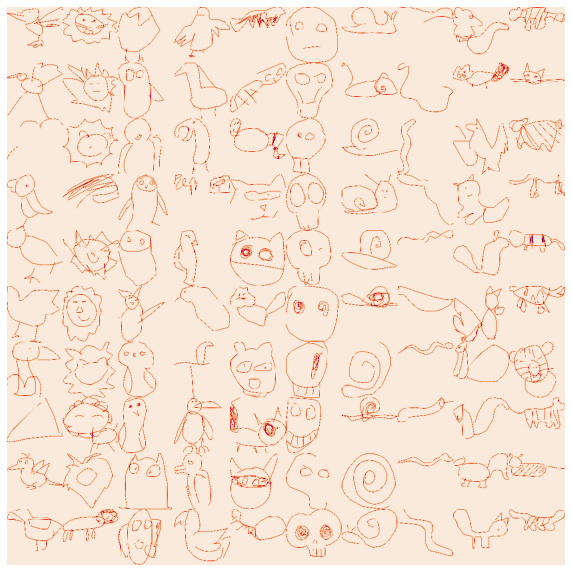

In [ ]:
visualize_classes2()

## Print t-SNE

calculating tsne ...


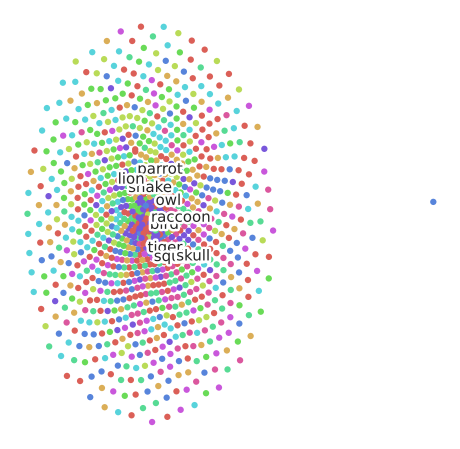

In [ ]:
from sklearn.manifold import TSNE

X = np.reshape(x_train2, (x_train2.shape[0], 128 * 128))[0:1000]
y = y_train2[0:1000]
plot_tsne(X, y)


## Train on larger images

In [ ]:
image_size = x_train2.shape[1]

# Reshape and normalize
x_train2 = x_train2.reshape(x_train2.shape[0], image_size, image_size, 1).astype('float32')

x_train2 /= 255.0

# Convert class vectors to class matrices
y_train2 = keras.utils.to_categorical(y_train2, len(class_names))


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train2.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='tanh'))
model.add(Dropout(0.5))
model.add(layers.Dense(len(class_names), activation='softmax')) 
# Train model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 16)      160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)       

In [ ]:
model.fit(x = x_train2, y = y_train2, validation_split=0.1, batch_size = 256, epochs=200)

Epoch 1/200
387/387 [==============================] - 11s 28ms/step - loss: 2.9260 - accuracy: 0.1718 - val_loss: 2.6432 - val_accuracy: 0.1897
Epoch 2/200
387/387 [==============================] - 11s 27ms/step - loss: 1.8972 - accuracy: 0.3222 - val_loss: 2.0701 - val_accuracy: 0.2876
Epoch 3/200
387/387 [==============================] - 11s 27ms/step - loss: 1.7614 - accuracy: 0.3752 - val_loss: 1.5492 - val_accuracy: 0.4778
Epoch 4/200
387/387 [==============================] - 11s 28ms/step - loss: 1.7083 - accuracy: 0.3992 - val_loss: 2.2676 - val_accuracy: 0.2011
Epoch 5/200
387/387 [==============================] - 11s 27ms/step - loss: 1.6974 - accuracy: 0.4071 - val_loss: 2.2611 - val_accuracy: 0.2780
Epoch 6/200
387/387 [==============================] - 11s 28ms/step - loss: 1.6799 - accuracy: 0.4106 - val_loss: 1.7630 - val_accuracy: 0.4041
Epoch 7/200
387/387 [==============================] - 11s 27ms/step - loss: 1.6573 - accuracy: 0.4193 - val_loss: 2.3565 - val_ac

### FAILURE!!!!

# References

* [t-SNE tutorial](https://github.com/oreillymedia/t-SNE-tutorial)

* [The quickdraw project](https://github.com/googlecreativelab/quickdraw-dataset#projects-using-the-dataset)